<a href="https://colab.research.google.com/github/fernandoantonio36/CursoSoftex/blob/main/Projeto_18_Arvores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Árvores Binárias

Crie uma árvore para cada lista abaixo, adicione um valor nela e remova outro, mas, em pelo menos uma das árvores, a remoção deve ser de um nó com dois filhos.

Lista1 = 45,20,30,60,81,97,100,7,8,4

Lista2 = 15,6,18,3,7,16,20,

Árvores binárias são árvores nas quais cada nodo pode ter no máximo dois filhos, conforme mostrado na figura abaixo.

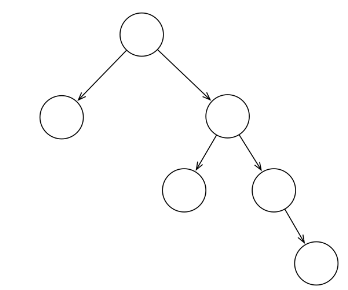


Foi realizado fork do seguinte perfil do Github para execução dessa atividade:
https://gist.github.com/divanibarbosa/a8662693e44ab9ee0d0e8c2d74808929

#### Classe Nó

In [1]:
class No:
     
     def __init__(self, key, dir, esq):
          self.item = key
          self.dir = dir
          self.esq = esq

#### Classe Árvore Binária

In [2]:
class ArvoreBinaria:

     def __init__(self):
          self.root = No(None,None,None)
          self.root = None

     def inserir(self, v):
          novo = No(v,None,None) # cria um novo Nó
          if self.root == None:
               self.root = novo
          else: # se nao for a raiz
               atual = self.root
               while True:
                    anterior = atual
                    if v <= atual.item: # ir para esquerda
                         atual = atual.esq
                         if atual == None:
                                anterior.esq = novo
                                return
                    # fim da condição ir a esquerda
                    else: # ir para direita
                         atual = atual.dir
                         if atual == None:
                                 anterior.dir = novo
                                 return
                    # fim da condição ir a direita


     def buscar(self, chave):
         if self.root == None:
              return None # se arvore vazia
         atual = self.root # começa a procurar desde raiz
         while atual.item != chave: # enquanto nao encontrou
               if chave < atual.item:
                    atual = atual.esq # caminha para esquerda
               else:
                    atual = atual.dir # caminha para direita
               if atual == None:
                    return None # encontrou uma folha -> sai
         return atual  # terminou o laço while e chegou aqui é pq encontrou item    


     # O sucessor é o Nó mais a esquerda da subarvore a direita do No que foi passado como parametro do metodo
     def nosucessor(self, apaga): # O parametro é a referencia para o No que deseja-se apagar
          paidosucessor = apaga
          sucessor = apaga
          atual = apaga.dir # vai para a subarvore a direita

          while atual != None: # enquanto nao chegar no Nó mais a esquerda
               paidosucessor = sucessor
               sucessor = atual
               atual = atual.esq # caminha para a esquerda

          # *********************************************************************************
          # quando sair do while "sucessor" será o Nó mais a esquerda da subarvore a direita
          # "paidosucessor" será o o pai de sucessor e "apaga" o Nó que deverá ser eliminado
          # *********************************************************************************
          if sucessor != apaga.dir: # se sucessor nao é o filho a direita do Nó que deverá ser eliminado
               paidosucessor.esq = sucessor.dir # pai herda os filhos do sucessor que sempre serão a direita
               # lembrando que o sucessor nunca poderá ter filhos a esquerda, pois, ele sempre será o
               # Nó mais a esquerda da subarvore a direita do Nó apaga.
               # lembrando também que sucessor sempre será o filho a esquerda do pai
               sucessor.dir = apaga.dir # guardando a referencia a direita do sucessor para 
                                        # quando ele assumir a posição correta na arvore
          return sucessor

     def remover(self, v):
         if self.root == None:
               return False # se arvore vazia
         atual = self.root
         pai = self.root
         filho_esq = True
         # ****** Buscando o valor **********
         while atual.item != v: # enquanto nao encontrou
               pai = atual
               if v < atual.item: # caminha para esquerda
                    atual = atual.esq
                    filho_esq = True # é filho a esquerda? sim
               else: # caminha para direita
                    atual = atual.dir 
                    filho_esq = False # é filho a esquerda? NAO
               if atual == None:
                    return False # encontrou uma folha -> sai
         # fim laço while de busca do valor

         # **************************************************************
         # se chegou aqui quer dizer que encontrou o valor (v)
         # "atual": contem a referencia ao No a ser eliminado
         # "pai": contem a referencia para o pai do No a ser eliminado
         # "filho_esq": é verdadeiro se atual é filho a esquerda do pai
         # **************************************************************

         # Se nao possui nenhum filho (é uma folha), elimine-o
         if atual.esq == None and atual.dir == None:
               if atual == self.root:
                    self.root = None # se raiz
               else:
                    if filho_esq:
                         pai.esq =  None # se for filho a esquerda do pai
                    else:
                         pai.dir = None # se for filho a direita do pai

         # Se é pai e nao possui um filho a direita, substitui pela subarvore a direita
         elif atual.dir == None:
               if atual == self.root:
                    self.root = atual.esq # se raiz
               else:
                    if filho_esq:
                         pai.esq = atual.esq # se for filho a esquerda do pai
                    else:
                         pai.dir = atual.esq # se for filho a direita do pai
         
         # Se é pai e nao possui um filho a esquerda, substitui pela subarvore a esquerda
         elif atual.esq == None:
               if atual == self.root:
                    self.root = atual.dir # se raiz
               else:
                    if filho_esq:
                         pai.esq = atual.dir # se for filho a esquerda do pai
                    else:
                         pai.dir = atual.dir # se for  filho a direita do pai

         # Se possui mais de um filho, se for um avô ou outro grau maior de parentesco
         else:
               sucessor = self.nosucessor(atual)
               # Usando sucessor que seria o Nó mais a esquerda da subarvore a direita do No que deseja-se remover
               if atual == self.root:
                    self.root = sucessor # se raiz
               else:
                    if filho_esq:
                         pai.esq = sucessor # se for filho a esquerda do pai
                    else:
                         pai.dir = sucessor # se for filho a direita do pai
               sucessor.esq = atual.esq # acertando o ponteiro a esquerda do sucessor agora que ele assumiu 
                                        # a posição correta na arvore   

         return True
  
     def inOrder(self, atual):
         if atual != None:
              self.inOrder(atual.esq)
              print(atual.item,end=" ")
              self.inOrder(atual.dir)
  
     def preOrder(self, atual):
         if atual != None:
              print(atual.item,end=" ")
              self.preOrder(atual.esq)
              self.preOrder(atual.dir)
       
     def posOrder(self, atual):
         if atual != None:
              self.posOrder(atual.esq)
              self.posOrder(atual.dir)
              print(atual.item,end=" ")

  
     def altura(self, atual):
          if atual == None or atual.esq == None and atual.dir == None:
               return 0
          else:
             if self.altura(atual.esq) > self.altura(atual.dir):
                return  1 + self.altura(atual.esq) 
             else:
                return  1 + self.altura(atual.dir) 
  
     def folhas(self, atual):
         if atual == None:
              return 0
         if atual.esq == None and atual.dir == None:
              return 1
         return self.folhas(atual.esq) + self.folhas(atual.dir)

  
     def contarNos(self, atual):
        if atual == None:
             return 0
        else:
             return  1 + self.contarNos(atual.esq) + self.contarNos(atual.dir)

     def minn(self):
         atual = self.root
         anterior = None
         while atual != None:
              anterior = atual
              atual = atual.esq
         return anterior

     def maxx(self):
         atual = self.root
         anterior = None
         while atual != None:
              anterior = atual
              atual = atual.dir
         return anterior

     def caminhar(self):
          print(" Exibindo em ordem: ",end="")
          self.inOrder(self.root)
          print("\n Exibindo em pos-ordem: ",end="")
          self.posOrder(self.root)
          print("\n Exibindo em pre-ordem: ",end="")
          self.preOrder(self.root)
          print("\n Altura da arvore: %d" %(self.altura(self.root)))
          print(" Quantidade de folhas: %d"  %(self.folhas(self.root)))
          print(" Quantidade de Nós: %d" %(self.contarNos(self.root)))
          if self.root != None: # se arvore nao esta vazia
             print(" Valor minimo: %d" %(self.minn().item))
             print(" Valor maximo: %d" %(self.maxx().item))
     
#### fim da classe ####


#### Realizando as operações básicas
1. Inserir
2. Remover
3. Buscar
4. Exibir
5. Sair do programa

In [3]:

arv = ArvoreBinaria()
print("Programa Arvore Binaria")
opcao = 0
while opcao != 5:
     print("***********************************")
     print("Entre com a opcao:")
     print(" --- 1: Inserir")
     print(" --- 2: Remover")
     print(" --- 3: Buscar")
     print(" --- 4: Exibir")
     print(" --- 5: Sair do programa")
     print("***********************************")
     opcao = int(input("-> "))
     if opcao == 1:
          x = int(input(" Informe o valor -> "))
          arv.inserir(x)
     elif opcao == 2:
          x = int(input(" Informe o valor -> "))
          if arv.remover(x) == False:
               print(" Valor nao encontrado!")
     elif opcao == 3:
          x = int(input(" Informe o valor -> "))
          if arv.buscar(x) != None:
               print(" Valor Encontrado")
          else:
               print(" Valor nao encontrado!")	 
     elif opcao == 4:
          arv.caminhar()
     elif opcao == 5:
          break
 


Programa Arvore Binaria
***********************************
Entre com a opcao:
 --- 1: Inserir
 --- 2: Remover
 --- 3: Buscar
 --- 4: Exibir
 --- 5: Sair do programa
***********************************
-> 1
 Informe o valor -> 45
***********************************
Entre com a opcao:
 --- 1: Inserir
 --- 2: Remover
 --- 3: Buscar
 --- 4: Exibir
 --- 5: Sair do programa
***********************************
-> 1
 Informe o valor -> 20
***********************************
Entre com a opcao:
 --- 1: Inserir
 --- 2: Remover
 --- 3: Buscar
 --- 4: Exibir
 --- 5: Sair do programa
***********************************
-> 1
 Informe o valor -> 30
***********************************
Entre com a opcao:
 --- 1: Inserir
 --- 2: Remover
 --- 3: Buscar
 --- 4: Exibir
 --- 5: Sair do programa
***********************************
-> 1
 Informe o valor -> 60
***********************************
Entre com a opcao:
 --- 1: Inserir
 --- 2: Remover
 --- 3: Buscar
 --- 4: Exibir
 --- 5: Sair do programa
**********